# 随机梯度下降（SGD）
用 SGD 在使用均方误差（MSE）作为损失函数时的计算过程。

### 数据和模型设置
首先定义我们的模型和数据集结构。假设我们有一个特征矩阵 $\mathbf{X}$ 和对应的目标值向量 $\mathbf{y}$。在这个例子中，$\mathbf{X}$ 是一个 $5 \times 3$ 矩阵，其中前两列是特征，最后一列全为1，作为偏置项 $b$ 的系数。

$\mathbf{X}$ 的结构如下（最后一列为偏置项）：
$$
\mathbf{X} = \begin{bmatrix}
x_{11} & x_{12} & 1 \\
x_{21} & x_{22} & 1 \\
x_{31} & x_{32} & 1 \\
x_{41} & x_{42} & 1 \\
x_{51} & x_{52} & 1 \\
\end{bmatrix}
$$

$\mathbf{y}$ 是目标值向量，有5个元素：
$$
\mathbf{y} = \begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
y_4 \\
y_5 \\
\end{bmatrix}
$$

$\mathbf{w}$ 是包括偏置在内的权重向量：
$$
\mathbf{w} = \begin{bmatrix}
w_1 \\
w_2 \\
b \\
\end{bmatrix}
$$


### 损失函数定义为：
$$
L(\mathbf{w}) = \frac{1}{n} \sum_{i=1}^n \left(\mathbf{w}^\top \mathbf{x}^{(i)} - y^{(i)}\right)^2
$$

其中 $n$ 是样本数量，$\mathbf{x}^{(i)}$ 是 $\mathbf{X}$ 中的第 $i$ 行。


### SGD 的一次迭代

1. **初始化权重**：权重向量 $\mathbf{w}$ 初始化，通常为随机小数或零

2. **选择样本**：在每次迭代中，SGD 从数据集中随机选择一个样本 $(\mathbf{x}^{(i)}, y^{(i)})$。

3. **计算预测值**：$\hat{y}^{(i)} = \mathbf{w}^\top \mathbf{x}^{(i)} = w_1 x_{i1} + w_2 x_{i2} + b$

4. **计算损失函数的梯度**：
   损失函数 $L^{(i)}(\mathbf{w}) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$ 关于 $\mathbf{w}$ 的梯度为：$\nabla_{\mathbf{w}} L^{(i)}(\mathbf{w}) = (\hat{y}^{(i)} - y^{(i)}) \mathbf{x}^{(i)}$
   具体来说，对于每个权重 $w_j$，梯度的 $j^{th}$ 分量是：$\frac{\partial L^{(i)}}{\partial w_j} = (\hat{y}^{(i)} - y^{(i)}) x_{ij}$

5. **更新权重**：
   使用学习率 $\eta$ 更新权重 $\mathbf{w}$：$\mathbf{w} \leftarrow \mathbf{w} - \eta \nabla_{\mathbf{w}} L^{(i)}(\mathbf{w})$
   这意味着每个权重 $w_j$ 会按照下面的规则更新：$w_j \leftarrow w_j - \eta (\hat{y}^{(i)} - y^{(i)}) x_{ij}$

6. **重复**：重复步骤 2 至 5，直到达到停止条件。停止条件可能包括：

    1. **达到预设的迭代次数**：经常设定一个最大迭代次数，以防模型训练时间过长或进入无限循环。
    2. **损失收敛**：如果连续几个迭代中损失函数的变化非常小（小于某个预设阈值），则可以认为模型已经收敛，停止迭代。
    3. **性能标准**：达到某个预设的性能标准，如验证集上的精确度或其他度量标准达到满意的水平。
    4. **早停**（Early Stopping）：在训练过程中监控验证集的损失，如果验证损失开始增加，即模型开始过拟合，可以提前停止训练。

通过这种方式，SGD 使用单个样本来估计梯度，并进行权重更新，逐步逼近损失函数的最小值。这种方法特别适合大规模数据集，

因为它显著减少了每次迭代的计算负担。

In [46]:
import numpy as np

# 随机数据数量
num_of_data = 20000
# 生成数据
np.random.seed(0)
x_value = np.random.rand(num_of_data, 2)
y_value = 4 * x_value[:, 0] + 0.5 * x_value[:, 1] + np.random.randn(num_of_data)  # 增加随机噪声
y_value

array([1.32256911, 2.12628773, 1.17466913, ..., 3.58628506, 4.41922111,
       0.9264583 ])

In [47]:
# 添加偏置项列 (全1列)
x_value = np.hstack([x_value, np.ones((x_value.shape[0], 1))])  # x_value 现在是 100 x 3

# 初始化随机权重
w = np.random.randn(3)  # 包括了对应于偏置项的权重
x_value

array([[0.5488135 , 0.71518937, 1.        ],
       [0.60276338, 0.54488318, 1.        ],
       [0.4236548 , 0.64589411, 1.        ],
       ...,
       [0.54089517, 0.6683831 , 1.        ],
       [0.99491147, 0.58822388, 1.        ],
       [0.42461491, 0.9016327 , 1.        ]])

In [48]:
# 设置学习率
learning_rate = 0.005
# 设置迭代次数
iterations = 1000

# 迭代, 执行SGD
for _ in range(iterations):
    # 随机选择一个样本
    i = np.random.randint(0, x_value.shape[0])
    x_i = x_value[i, :]
    y_i = y_value[i]

    # 计算预测值
    y_pred = np.dot(x_i, w)

    # 计算梯度
    gradient = (y_pred - y_i) * x_i

    # 更新权重
    w -= learning_rate * gradient

    # 可以选择在此打印中间结果，例如每10次迭代打印一次损失和权重
    if _ % 10 == 0:
        loss = np.mean(0.5 * (np.dot(x_value, w) - y_value) ** 2)  # 计算当前损失
        print(f"Iteration {_}: Loss = {loss:.4f}")

w

Iteration 0: Loss = 1.9939
Iteration 10: Loss = 1.9586
Iteration 20: Loss = 1.7878
Iteration 30: Loss = 1.6773
Iteration 40: Loss = 1.6915
Iteration 50: Loss = 1.6521
Iteration 60: Loss = 1.6003
Iteration 70: Loss = 1.4669
Iteration 80: Loss = 1.4313
Iteration 90: Loss = 1.4074
Iteration 100: Loss = 1.3667
Iteration 110: Loss = 1.3450
Iteration 120: Loss = 1.3196
Iteration 130: Loss = 1.3066
Iteration 140: Loss = 1.2959
Iteration 150: Loss = 1.2976
Iteration 160: Loss = 1.2616
Iteration 170: Loss = 1.2410
Iteration 180: Loss = 1.2330
Iteration 190: Loss = 1.2196
Iteration 200: Loss = 1.2143
Iteration 210: Loss = 1.2124
Iteration 220: Loss = 1.2064
Iteration 230: Loss = 1.2013
Iteration 240: Loss = 1.1896
Iteration 250: Loss = 1.1873
Iteration 260: Loss = 1.1793
Iteration 270: Loss = 1.1779
Iteration 280: Loss = 1.1759
Iteration 290: Loss = 1.1690
Iteration 300: Loss = 1.1687
Iteration 310: Loss = 1.1686
Iteration 320: Loss = 1.1596
Iteration 330: Loss = 1.1554
Iteration 340: Loss = 1.1

array([ 0.96979278, -0.28293734,  2.10443417])

在使用随机梯度下降（SGD）时，你可能会观察到损失值在迭代过程中不是单调下降的，而是有波动的。这种波动主要由以下几个原因导致：

1. **单个样本的梯度**：SGD每次更新只使用一个随机选取的样本来计算梯度。这个单独样本的梯度不一定是整个数据集损失的真实最佳下降方向。因此，某些更新可能实际上并不是在减少整体损失，而是在某种程度上增加了整体损失。

2. **学习率的影响**：如果学习率设置得较大，那么权重更新的每一步都会较大，这可能导致超过损失函数的最小值点，从而在损失曲线上产生过冲现象，这会使得损失在某些迭代中突然增大。

3. **样本的噪声和数据分布**：由于引入的随机噪声以及数据自身的分布特性，某些样本可能具有误导性，导致梯度更新并不总是指向整体最优方向。

4. **参数空间的复杂性**：优化的参数空间可能非常复杂，包含多个局部最小值、鞍点等。SGD由于其随机性，可能在这些区域中游走，从而导致损失不稳定。

如何处理这种波动？

- **减小学习率**：减小学习率可以帮助减少每次更新的步长，从而可能减少波动性和过冲现象，使模型更稳定地向全局最小值收敛。
- **使用学习率衰减**：随着迭代次数的增加，逐渐减小学习率，这是一种常用的策略，有助于初期快速收敛，后期保持稳定。
- **增加迭代次数**：有时候简单地增加迭代次数可以允许模型有更多机会从可能的错误方向中恢复。
- **使用小批量梯度下降（Mini-batch Gradient Descent）**：这是一种介于全批量和随机梯度下降之间的方法，每次更新不是使用单个样本，也不是使用全部样本，而是使用一个小批量的样本。这可以减少估计梯度的方差，使得更新更加平稳。

通过这些方法，你可以尝试减少训练过程中的损失波动，并提高模型的收敛性和稳定性。

为了在随机梯度下降（SGD）中实现学习率衰减，我们可以在每次迭代时将学习率按一定的策略减少。常见的学习率衰减策略包括：

1. **固定衰减**：每隔一定的迭代次数，将学习率乘以一个小的因子。
2. **指数衰减**：学习率按照指数函数形式衰减。
3. **逐步衰减**：在特定的迭代次数后，学习率降低到一个较小的值。


In [49]:
import numpy as np

# 生成数据
np.random.seed(0)
x_value = np.random.rand(num_of_data, 2)
y_value = 4 * x_value[:, 0] + 1 * x_value[:, 1] + np.random.randn(num_of_data)  # 增加随机噪声

# 添加偏置项列 (全1列)
# x_value = np.hstack([x_value, np.ones((x_value.shape[0], 1))])  # x_value 现在是 100 x 3

# 初始化权重
w = np.random.randn(2)  # 包括了对应于偏置项的权重

# 总迭代次数
iterations = 10000

# 设置初始学习率
initial_learning_rate = 0.99

# 计算衰减率
final_learning_rate = 0.00001
decay_rate = (final_learning_rate / initial_learning_rate) ** (1 / iterations)

# 执行 SGD
weight_history = []
for iteration in range(iterations):
    # 计算当前学习率
    learning_rate = initial_learning_rate * (decay_rate ** iteration)

    # 随机选择一个样本
    i = np.random.randint(0, x_value.shape[0])
    x_i = x_value[i, :]
    y_i = y_value[i]

    # 计算预测值
    y_pred = np.dot(x_i, w)

    # 计算梯度
    gradient = (y_pred - y_i) * x_i

    # 更新权重
    w -= learning_rate * gradient

    # 打印中间结果
    if iteration % 100 == 0:
        loss = np.mean(0.5 * (np.dot(x_value, w) - y_value) ** 2)  # 计算当前损失
        print(f"Iteration {iteration}: Loss = {loss:.4f}, Learning Rate = {learning_rate:.6f}")
        weight_history.append(w.copy())
    
# 最终权重结果
w

Iteration 0: Loss = 2.5802, Learning Rate = 0.990000
Iteration 100: Loss = 0.9952, Learning Rate = 0.882427
Iteration 200: Loss = 0.5040, Learning Rate = 0.786543
Iteration 300: Loss = 0.5077, Learning Rate = 0.701078
Iteration 400: Loss = 0.5255, Learning Rate = 0.624899
Iteration 500: Loss = 0.5994, Learning Rate = 0.556998
Iteration 600: Loss = 0.5107, Learning Rate = 0.496475
Iteration 700: Loss = 0.5326, Learning Rate = 0.442528
Iteration 800: Loss = 0.5283, Learning Rate = 0.394443
Iteration 900: Loss = 0.6968, Learning Rate = 0.351583
Iteration 1000: Loss = 0.5429, Learning Rate = 0.313380
Iteration 1100: Loss = 0.6532, Learning Rate = 0.279329
Iteration 1200: Loss = 0.5742, Learning Rate = 0.248977
Iteration 1300: Loss = 0.5274, Learning Rate = 0.221923
Iteration 1400: Loss = 0.5013, Learning Rate = 0.197809
Iteration 1500: Loss = 0.5108, Learning Rate = 0.176315
Iteration 1600: Loss = 0.5089, Learning Rate = 0.157157
Iteration 1700: Loss = 0.5179, Learning Rate = 0.140080
Iter

array([3.97455299, 1.01912557])

In [50]:
# 使用np.linalg.lstsq线性回归模型进行验证
w_np, _, _, _ = np.linalg.lstsq(x_value, y_value, rcond=None)
w_np

array([3.9914596 , 1.00504097])

In [51]:
# 计算损失
loss_np = np.mean(0.5 * (np.dot(x_value, w_np) - y_value) ** 2)
loss_np

0.5005136498466582

批量梯度下降耗时:  0.01348567008972168
最终权重:  [3.92574843 1.1955834 ]
最小损失:  0.49625382578199195
解析解权重:  [3.83265792 1.00410381]
解析解损失:  0.48454773186557276


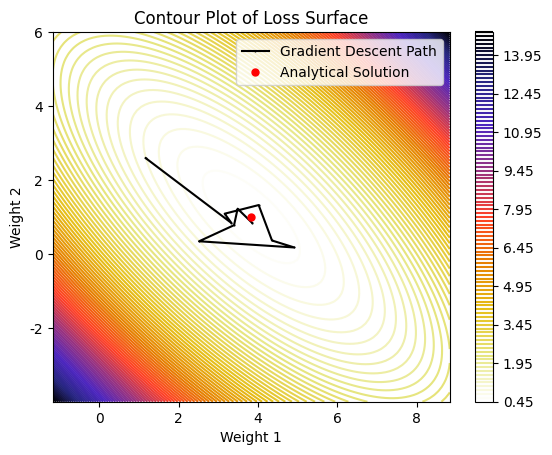

In [53]:
import time
import numpy as np
import matplotlib.pyplot as plt

# 生成数据
num_of_data = 200
np.random.seed(0)
x_value = np.random.rand(num_of_data, 2)
y_value = 4 * x_value[:, 0] + 1 * x_value[:, 1] + np.random.randn(num_of_data)  # 增加随机噪声

# 初始化权重
w = np.random.randn(2)  # 包括了对应于偏置项的权重

# 总迭代次数
iterations = 1000
# 设置初始学习率
initial_learning_rate = 0.99
learning_rate = initial_learning_rate
# 最小学习率
min_learning_rate = 0.01


def mse_loss(x, y, w_i):
    n = len(y)
    y_p = x.dot(w_i)
    the_loss = (1 / n) * np.sum(0.5 * (y_p - y) ** 2)
    return the_loss


# 执行 SGD
weight_history = []
s_t = time.time()
for iteration in range(iterations):
    # 计算当前学习率
    learning_rate = max(min_learning_rate, learning_rate - (initial_learning_rate - min_learning_rate) / iterations)

    # 随机选择一个样本
    i = np.random.randint(0, x_value.shape[0])
    x_i = x_value[i, :]
    y_i = y_value[i]

    # 计算预测值
    y_pred = np.dot(x_i, w)

    # 计算梯度
    gradient = (y_pred - y_i) * x_i

    # 更新权重
    w -= learning_rate * gradient

    # 打印中间结果
    if iteration % 100 == 0:
        loss = np.mean(0.5 * (np.dot(x_value, w) - y_value) ** 2)  # 计算当前损失
        # print(f"Iteration {iteration}: Loss = {loss:.4f}, Learning Rate = {learning_rate:.6f}")
        weight_history.append(w.copy())

print('批量梯度下降耗时: ', time.time() - s_t)
print('最终权重: ', w)
print('最小损失: ', mse_loss(x_value, y_value, w))

'''用 np.linalg 计算线性回归的解析解'''
w_np, _, _, _ = np.linalg.lstsq(x_value, y_value, rcond=None)
print('解析解权重: ', w_np)
print('解析解损失: ', mse_loss(x_value, y_value, w_np))

'''生成损失曲面等高线2D'''
w1 = np.linspace(w_np[0] - 5, w_np[0] + 5, 100)
w2 = np.linspace(w_np[1] - 5, w_np[1] + 5, 100)
w1, w2 = np.meshgrid(w1, w2)
losses = np.zeros_like(w1)

# 计算网格上每点的损失
for i in range(w1.shape[0]):
    for j in range(w1.shape[1]):
        weight = np.array([w1[i, j], w2[i, j]])
        losses[i, j] = mse_loss(x_value, y_value, weight)

# 绘制等高线图
fig, ax = plt.subplots()
CS = ax.contour(w1, w2, losses, 100, cmap='CMRmap_r')  # 生成1000层等高线
plt.colorbar(CS)

# 绘制梯度下降路径
path = np.array(weight_history)
ax.plot(path[:, 0], path[:, 1], label='Gradient Descent Path', color='black', marker='.', linestyle='-', markersize=1)

# 标记解析解位置
ax.plot([w_np[0]], [w_np[1]], 'ro', markersize=5, label='Analytical Solution')

# 设置图例和标签
ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
ax.set_title('Contour Plot of Loss Surface')
ax.legend()

plt.show()